In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

temp = pd.read_csv('/content/drive/MyDrive/train_temp.csv')
humid = pd.read_csv('/content/drive/MyDrive/train_humidity.csv')

temp.info(), humid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _start        2924 non-null   object 
 1   _stop         2924 non-null   object 
 2   _time         2924 non-null   object 
 3   _value        2924 non-null   float64
 4   _field        2924 non-null   object 
 5   _measurement  2924 non-null   object 
dtypes: float64(1), object(5)
memory usage: 137.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _start        2924 non-null   object 
 1   _stop         2924 non-null   object 
 2   _time         2924 non-null   object 
 3   _value        2924 non-null   float64
 4   _field        2924 non-null   object 
 5   _measurement  2924 non-null   object 
dtypes: float64(1), object(5)
memory usage: 13

(None, None)

In [3]:
# Extract and rename the columns as per the requirement
temp['datetime'] = pd.to_datetime(temp['_time'])
temp['temp'] = temp['_value']

humid['humidity'] = humid['_value']
humid['datetime'] = pd.to_datetime(temp['_time'])

# Merge the datasets on the datetime column
combined_dataset = pd.merge(temp[['datetime', 'temp']], humid[['datetime', 'humidity']], on='datetime')

# Display the first few rows of the combined dataset
combined_dataset.head()

,datetime,temp,humidity
0,2024-05-08 05:13:15+00:00,39.37,48.23
1,2024-05-08 05:14:15+00:00,38.20,50.07
2,2024-05-08 05:15:15+00:00,38.59,48.96
3,2024-05-08 05:15:45+00:00,38.64,48.77
4,2024-05-08 05:16:45+00:00,38.77,48.61


In [ ]:
combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   datetime  2924 non-null   datetime64[ns, UTC]
 1   temp      2924 non-null   float64            
 2   humidity  2924 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(2)
memory usage: 68.7 KB


In [5]:
# Checking for missing values
missing_values = combined_dataset.isnull().sum()

# Checking for duplicate timestamps
duplicate_timestamps = combined_dataset.duplicated(subset=['datetime']).sum()

missing_values, duplicate_timestamps

(datetime    0
 temp        0
 humidity    0
 dtype: int64,
 0)

# Data Analytics

## Time series plot

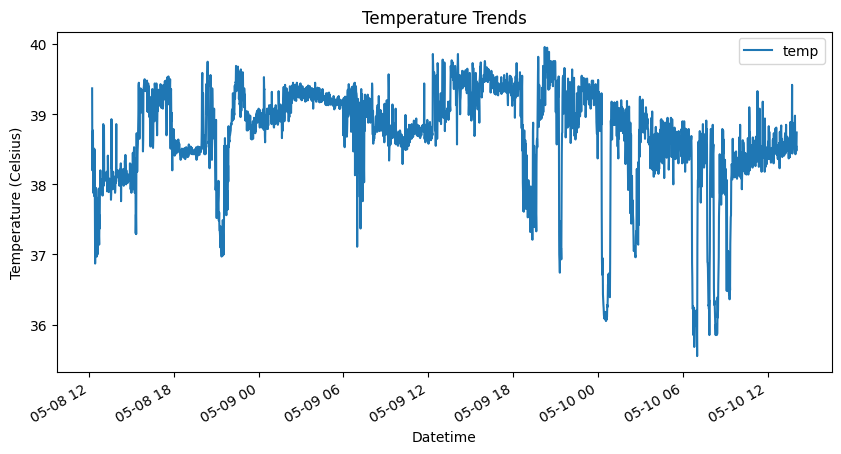

In [8]:
import matplotlib.pyplot as plt

# Convert the datetime from UTC to Thailand timezone ('Asia/Bangkok')
combined_dataset['datetime'] = combined_dataset['datetime'].dt.tz_convert('Asia/Bangkok')

combined_dataset.plot(x='datetime', y=['temp'], figsize=(10, 5))
plt.title('Temperature Trends')
plt.xlabel('Datetime')
plt.ylabel('Temperature (Celsius)')
plt.show()

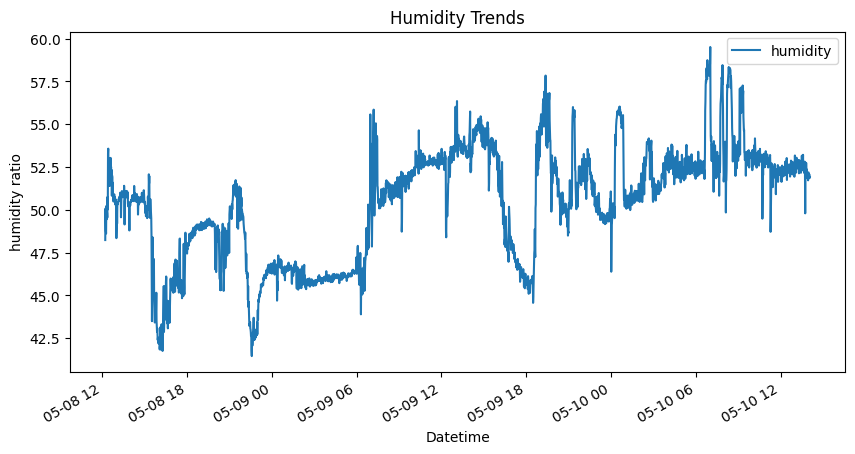

In [9]:
combined_dataset.plot(x='datetime', y='humidity', figsize=(10, 5))
plt.title('Humidity Trends')
plt.xlabel('Datetime')
plt.ylabel('humidity ratio')
plt.show()

## Distribution Analysis
1. Temperature dataset has many lower bound outlier
2. At 9.00 pm. the outiers are usually occurs
3. 10/5/2567 has almost outlier

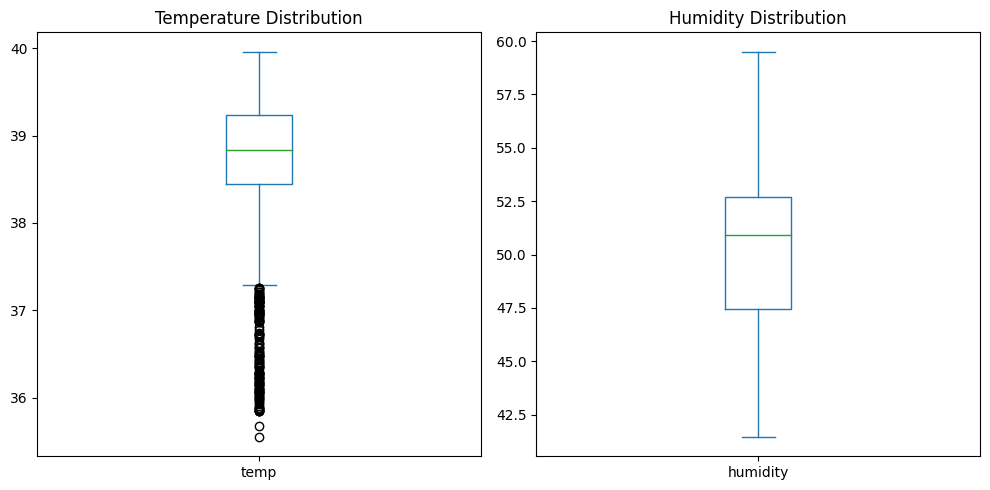

In [7]:
import matplotlib.pyplot as plt

# Creating box plots for temperature and humidity
plt.figure(figsize=(10, 5))

# Box plot for temperature
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
combined_dataset['temp'].plot(kind='box', title='Temperature Distribution')

# Box plot for humidity
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
combined_dataset['humidity'].plot(kind='box', title='Humidity Distribution')

plt.tight_layout()
plt.show()

In [10]:
# Calculate the IQR for temperature to identify outliers
Q1_temp = combined_dataset['temp'].quantile(0.25)
Q3_temp = combined_dataset['temp'].quantile(0.75)
IQR_temp = Q3_temp - Q1_temp

# Define bounds for outliers
lower_bound_temp = Q1_temp - 1.5 * IQR_temp
upper_bound_temp = Q3_temp + 1.5 * IQR_temp

# Filter the dataset for outlier temperatures
outlier_temp = combined_dataset[(combined_dataset['temp'] < lower_bound_temp) | (combined_dataset['temp'] > upper_bound_temp)]

# Convert datetime to a more readable format
outlier_temp['datetime'] = outlier_temp['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')

outlier_temp

<ipython-input-10-e5e5e16c01cf>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_temp['datetime'] = outlier_temp['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')


,datetime,temp,humidity
13,2024-05-08 12:26:00,36.87,53.57
20,2024-05-08 12:33:00,36.97,53.00
22,2024-05-08 12:35:00,37.15,52.73
23,2024-05-08 12:36:00,37.00,53.03
24,2024-05-08 12:37:00,37.15,52.34
...,...,...,...
2644,2024-05-10 09:18:00,36.62,56.71
2645,2024-05-10 09:19:00,36.36,57.26
2646,2024-05-10 09:20:00,36.63,56.68
2647,2024-05-10 09:21:00,36.49,56.95


              temp  humidity
temp      1.000000 -0.771144
humidity -0.771144  1.000000


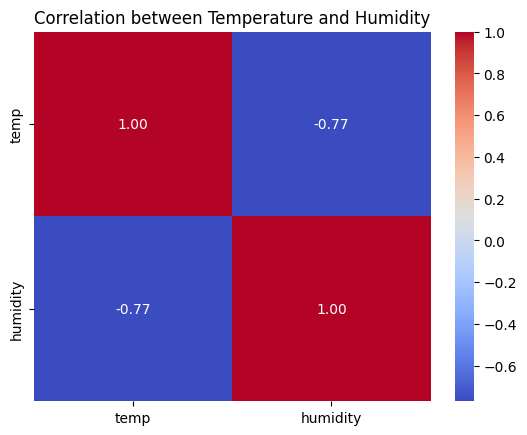

In [11]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# correlation_matrix = outlier_temp[[ 'temp', 'humidity']].corr()
# print(correlation_matrix)

# # Plot the heatmap
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation between Temperature and Humidity')
# plt.show()

In [ ]:
combined_dataset.describe()

,temp,humidity
count,2924.000000,2924.000000
mean,38.717916,50.351003
std,0.713927,3.291338
min,35.550000,41.450000
25%,38.450000,47.430000
50%,38.830000,50.910000
75%,39.230000,52.710000
max,39.960000,59.510000


## Decomposition

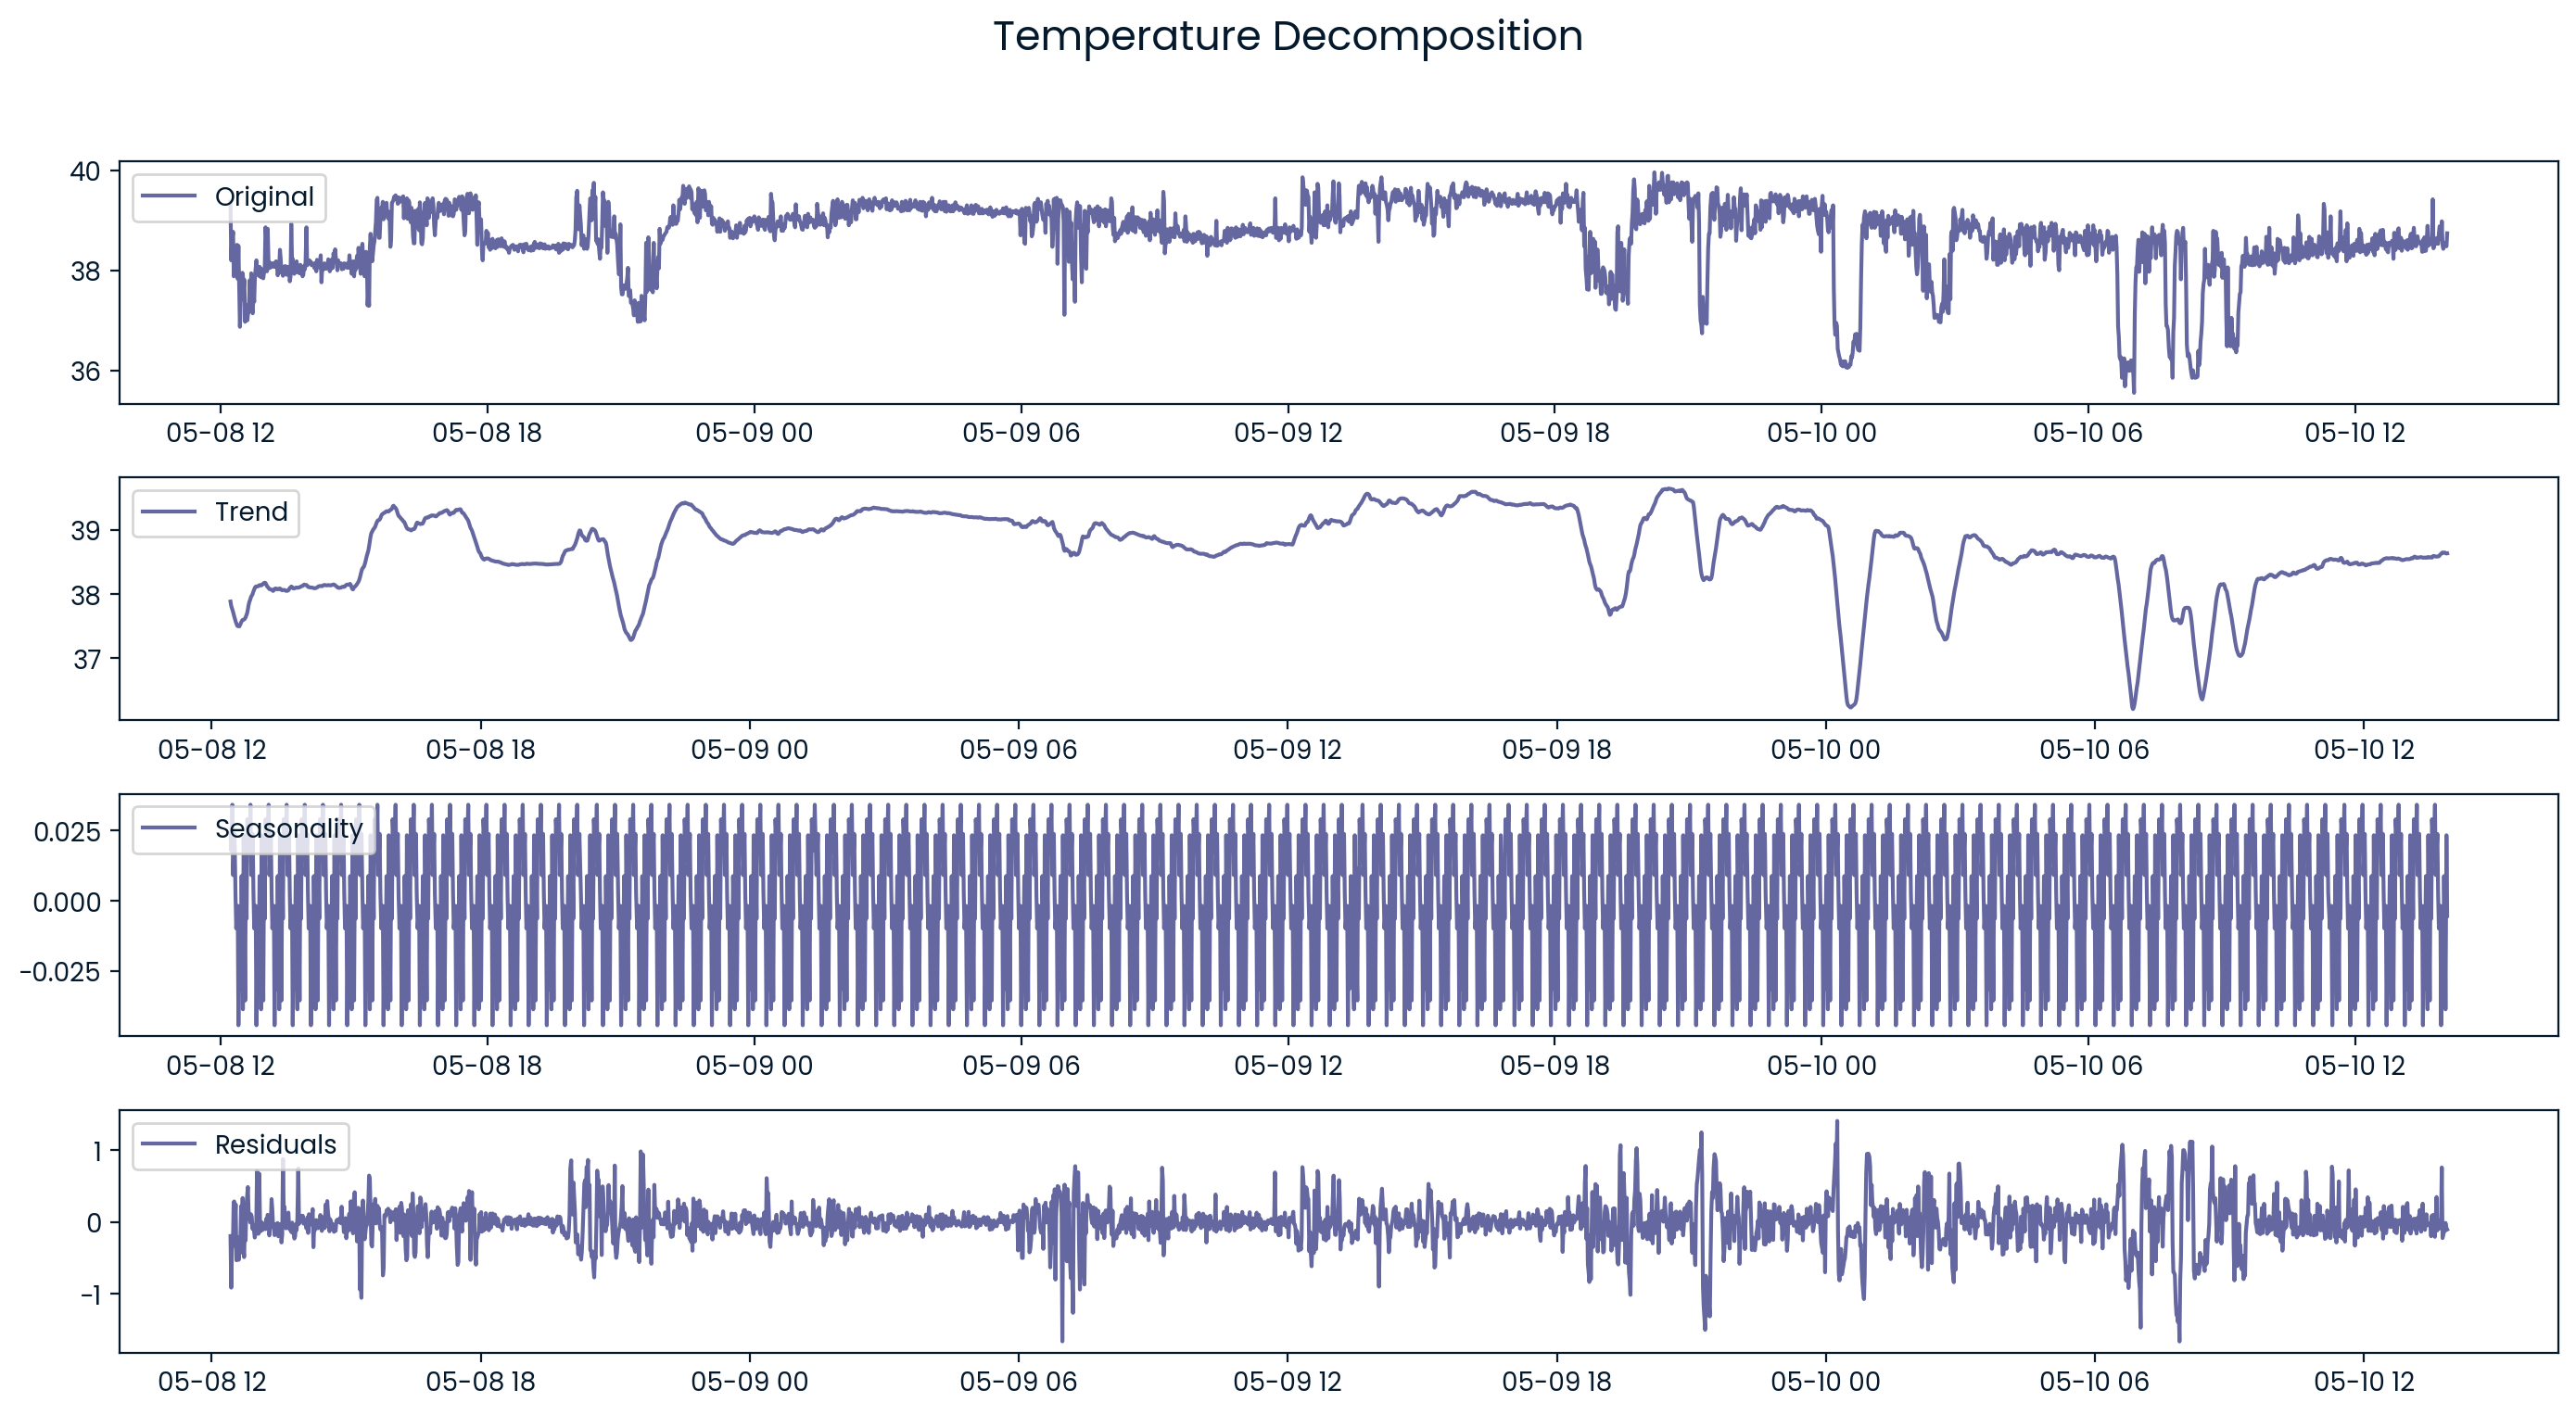

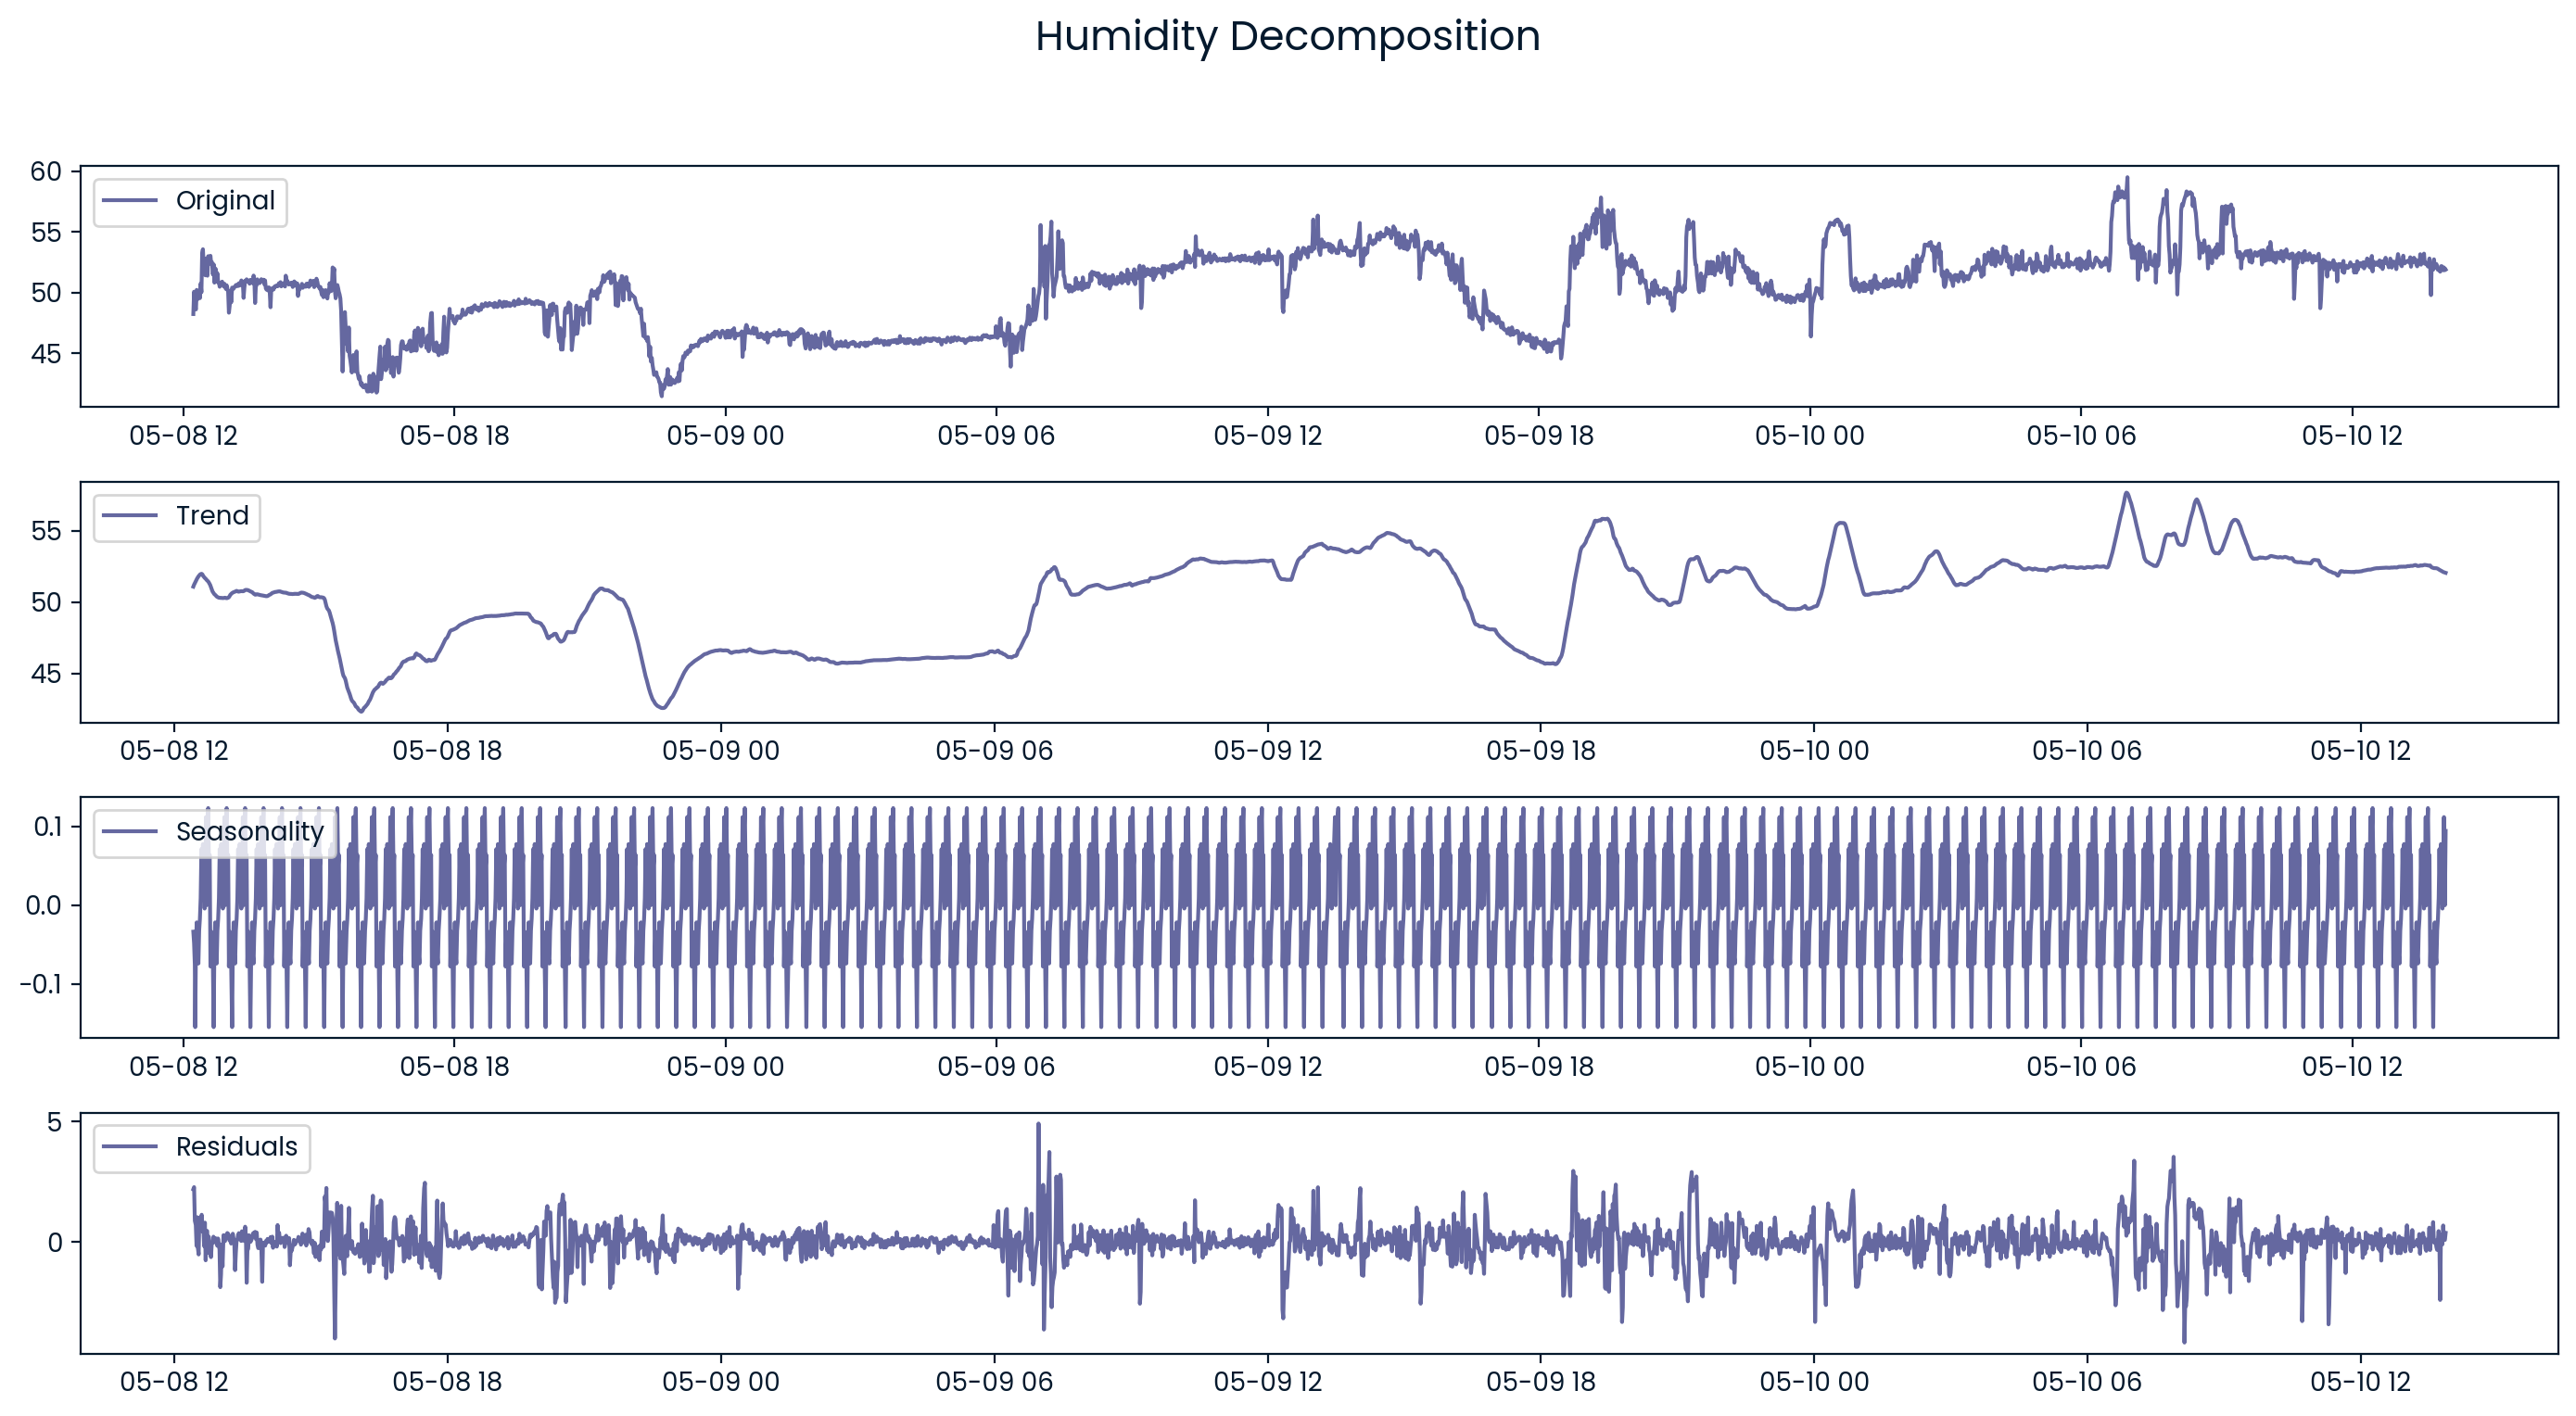

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Assuming 'datetime' is already set as the index in the combined_dataset
# If not, uncomment the following line
# combined_dataset.set_index('datetime', inplace=True)

# Decomposing the temperature data
result_temp = seasonal_decompose(combined_dataset['temp'], model='additive', period=24)

# Plotting the decomposed components of temperature
plt.figure(figsize=(14, 8))
plt.suptitle('Temperature Decomposition', fontsize=16)

plt.subplot(411)
plt.plot(result_temp.observed, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result_temp.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result_temp.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result_temp.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rect to make space for the suptitle
plt.show()

# Decomposing the humidity data
result_humidity = seasonal_decompose(combined_dataset['humidity'], model='additive', period=24)

# Plotting the decomposed components of humidity
plt.figure(figsize=(14, 8))
plt.suptitle('Humidity Decomposition', fontsize=16)

plt.subplot(411)
plt.plot(result_humidity.observed, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result_humidity.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result_humidity.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result_humidity.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rect to make space for the suptitle
plt.show()